# Xception Transfer Learning with CUB-200-2011 Dataset

In [10]:
import tensorflow as tf

In [11]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Run ID

In [12]:
import datetime as dt

# run_id = dt.datetime.now().strftime("%Y%m%d-%H%M%S")
tb_log_dir = './tb_log_2'

## Parameters

In [13]:
# Parameter space setup
optimizers = [
    tf.optimizers.Adam(
        # learning_rate=0.001, # this is the default
    ),
    tf.optimizers.Adam(
        learning_rate=0.0001,
    ),
]

losses = {
    'Categorical Cross Entropy': tf.keras.losses.CategoricalCrossentropy(),
    'Binary Cross Entropy': tf.keras.losses.BinaryCrossentropy(
        from_logits = True,
    ),
}

In [14]:
# Selected model parameters

batch_size = 128
dropout = 0.4
optimizer = optimizers[0]
loss = losses['Categorical Cross Entropy']


In [15]:
epochs = 80

## Load Dataset

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/mnt/cub/CUB_200_2011/images'

datagen = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.xception.preprocess_input,
    validation_split=0.2,
)


In [17]:
train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(299,299),
    batch_size=batch_size,
    subset='training',
    shuffle=True,
)

validation_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(299,299),
    batch_size=batch_size,
    subset='validation',
    shuffle=True,
)


Found 9465 images belonging to 200 classes.
Found 2323 images belonging to 200 classes.


In [18]:
type(train_gen)

keras.preprocessing.image.DirectoryIterator

## Build Model

In [20]:
from tensorflow.keras import layers

# https://www.tensorflow.org/tutorials/images/data_augmentation
model = tf.keras.models.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

base_model = tf.keras.applications.Xception(
    include_top=False,
    pooling='avg',
    # weights="imagenet"
)
basemodel.trainable = False
model.add(base_model)

# model.add( GlobalAveragePooling2D() )
model.add( layers.Dropout(dropout) )
model.add( layers.Dense(200) )
model.add( layers.Activation("softmax", dtype="float32") )


ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Mul]

In [ ]:
model.summary()

In [21]:
%%time
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=[
        'accuracy',
        tf.keras.metrics.TopKCategoricalAccuracy(k=3, name="Top3"),
        tf.keras.metrics.TopKCategoricalAccuracy(k=10, name="Top10"),
    ],
)

CPU times: user 7.28 ms, sys: 366 µs, total: 7.65 ms
Wall time: 8.59 ms


## Train

In [12]:
%%time
history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=validation_gen,
    callbacks=[
        tf.keras.callbacks.TensorBoard(
            log_dir = tb_log_dir,
            histogram_freq=1,
        )
        #tf.keras.callbacks.EarlyStopping(
        #    monitor='val_accuracy',
        #    patience=5,
        #    min_delta=0.001,
        #    mode='max',
        #),
        #tf.keras.callbacks.ModelCheckpoint(
        ##    filepath='checkpoints3',
        #    save_weights_only=True,
        #),
    ]
)

Epoch 1/80
74/74 [==============================] - 35s 397ms/step - loss: 5.1689 - accuracy: 0.0228 - Top3: 0.0575 - Top10: 0.1441 - val_loss: 4.9639 - val_accuracy: 0.0895 - val_Top3: 0.1985 - val_Top10: 0.4077
Epoch 2/80
74/74 [==============================] - 25s 332ms/step - loss: 4.8193 - accuracy: 0.1002 - Top3: 0.2208 - Top10: 0.4285 - val_loss: 4.6533 - val_accuracy: 0.2355 - val_Top3: 0.4460 - val_Top10: 0.7090
Epoch 3/80
74/74 [==============================] - 25s 335ms/step - loss: 4.5181 - accuracy: 0.2054 - Top3: 0.3816 - Top10: 0.6430 - val_loss: 4.3755 - val_accuracy: 0.3418 - val_Top3: 0.5764 - val_Top10: 0.8158
Epoch 4/80
74/74 [==============================] - 25s 333ms/step - loss: 4.2478 - accuracy: 0.2849 - Top3: 0.5036 - Top10: 0.7600 - val_loss: 4.1276 - val_accuracy: 0.4120 - val_Top3: 0.6509 - val_Top10: 0.8661
Epoch 5/80
74/74 [==============================] - 25s 329ms/step - loss: 4.0057 - accuracy: 0.3559 - Top3: 0.5880 - Top10: 0.8249 - val_loss: 3.90

74/74 [==============================] - 25s 333ms/step - loss: 1.5561 - accuracy: 0.7163 - Top3: 0.8837 - Top10: 0.9681 - val_loss: 1.7687 - val_accuracy: 0.6216 - val_Top3: 0.8248 - val_Top10: 0.9397
Epoch 40/80
74/74 [==============================] - 25s 332ms/step - loss: 1.5340 - accuracy: 0.7251 - Top3: 0.8859 - Top10: 0.9695 - val_loss: 1.7515 - val_accuracy: 0.6263 - val_Top3: 0.8239 - val_Top10: 0.9406
Epoch 41/80
74/74 [==============================] - 25s 335ms/step - loss: 1.5112 - accuracy: 0.7248 - Top3: 0.8863 - Top10: 0.9674 - val_loss: 1.7348 - val_accuracy: 0.6246 - val_Top3: 0.8257 - val_Top10: 0.9406
Epoch 42/80
74/74 [==============================] - 25s 334ms/step - loss: 1.4911 - accuracy: 0.7295 - Top3: 0.8908 - Top10: 0.9704 - val_loss: 1.7189 - val_accuracy: 0.6272 - val_Top3: 0.8265 - val_Top10: 0.9397
Epoch 43/80
74/74 [==============================] - 25s 336ms/step - loss: 1.4721 - accuracy: 0.7311 - Top3: 0.8891 - Top10: 0.9687 - val_loss: 1.7034 - va

74/74 [==============================] - 25s 332ms/step - loss: 1.0409 - accuracy: 0.7932 - Top3: 0.9235 - Top10: 0.9802 - val_loss: 1.3988 - val_accuracy: 0.6595 - val_Top3: 0.8480 - val_Top10: 0.9501
Epoch 78/80
74/74 [==============================] - 25s 332ms/step - loss: 1.0357 - accuracy: 0.7938 - Top3: 0.9255 - Top10: 0.9803 - val_loss: 1.3937 - val_accuracy: 0.6608 - val_Top3: 0.8476 - val_Top10: 0.9496
Epoch 79/80
74/74 [==============================] - 25s 329ms/step - loss: 1.0254 - accuracy: 0.7960 - Top3: 0.9274 - Top10: 0.9811 - val_loss: 1.3885 - val_accuracy: 0.6616 - val_Top3: 0.8472 - val_Top10: 0.9518
Epoch 80/80
74/74 [==============================] - 25s 333ms/step - loss: 1.0179 - accuracy: 0.7942 - Top3: 0.9271 - Top10: 0.9813 - val_loss: 1.3837 - val_accuracy: 0.6608 - val_Top3: 0.8476 - val_Top10: 0.9514
CPU times: user 40min 36s, sys: 15min 44s, total: 56min 21s
Wall time: 33min 17s


## Evaluation

In [13]:
%%time
model.evaluate(validation_gen)

19/19 [==============================] - 5s 231ms/step - loss: 1.3837 - accuracy: 0.6608 - Top3: 0.8476 - Top10: 0.9514
CPU times: user 4.58 s, sys: 603 ms, total: 5.19 s
Wall time: 4.95 s


[1.3837388753890991,
 0.6607834696769714,
 0.8476108312606812,
 0.9513559937477112]

In [14]:
import os
model.save(f'model.{os.uname()[1]}.003')

INFO:tensorflow:Assets written to: model.cserv.003/assets


INFO:tensorflow:Assets written to: model.cserv.003/assets


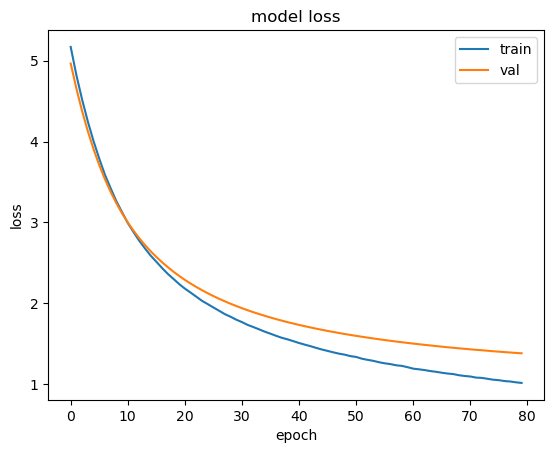

In [15]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()